In [27]:
import numpy as np 
from sklearn import datasets, model_selection, metrics, tree, ensemble
digits = datasets.load_digits() 

In [28]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [29]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [30]:
digits.data.shape

(1797, 64)

In [31]:
digits.data[:2]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

In [32]:
digits.target.shape

(1797,)

In [33]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [34]:
digits.images.shape

(1797, 8, 8)

In [35]:
print("Feature names:\n", np.transpose(digits.feature_names))

Feature names:
 ['pixel_0_0' 'pixel_0_1' 'pixel_0_2' 'pixel_0_3' 'pixel_0_4' 'pixel_0_5'
 'pixel_0_6' 'pixel_0_7' 'pixel_1_0' 'pixel_1_1' 'pixel_1_2' 'pixel_1_3'
 'pixel_1_4' 'pixel_1_5' 'pixel_1_6' 'pixel_1_7' 'pixel_2_0' 'pixel_2_1'
 'pixel_2_2' 'pixel_2_3' 'pixel_2_4' 'pixel_2_5' 'pixel_2_6' 'pixel_2_7'
 'pixel_3_0' 'pixel_3_1' 'pixel_3_2' 'pixel_3_3' 'pixel_3_4' 'pixel_3_5'
 'pixel_3_6' 'pixel_3_7' 'pixel_4_0' 'pixel_4_1' 'pixel_4_2' 'pixel_4_3'
 'pixel_4_4' 'pixel_4_5' 'pixel_4_6' 'pixel_4_7' 'pixel_5_0' 'pixel_5_1'
 'pixel_5_2' 'pixel_5_3' 'pixel_5_4' 'pixel_5_5' 'pixel_5_6' 'pixel_5_7'
 'pixel_6_0' 'pixel_6_1' 'pixel_6_2' 'pixel_6_3' 'pixel_6_4' 'pixel_6_5'
 'pixel_6_6' 'pixel_6_7' 'pixel_7_0' 'pixel_7_1' 'pixel_7_2' 'pixel_7_3'
 'pixel_7_4' 'pixel_7_5' 'pixel_7_6' 'pixel_7_7']


In [36]:
X = digits.data
y = digits.target

In [37]:
len(digits.feature_names)

64

In [38]:
def write_answer(a, file_name):  
    with open(file_name, "w") as fout:
        fout.write(str(a))

### Task 1: DecisionTreeClassifier and its score
Make **DecisionTreeClassifier** with default settings and measure the quality of its operation using **cross_val_score**. 

We create a classifier with default parameters, and the data sample does not need to be divided. Both **X** and **y** are fit for classifier and CV scoring.

In [39]:
DT_clf = tree.DecisionTreeClassifier(random_state=0)
DT_clf.fit(X, y)

DecisionTreeClassifier(random_state=0)

In [40]:
DT_scoring = model_selection.cross_val_score(DT_clf, X, y,  cv = 10) # scoring = "accuracy",

The **cross_val_score()** function returns a numpy ndarray, which will have **k** (*k=cv*) quality numbers in each of the k-fold cross validation experiments.

In [41]:
print(DT_scoring)

print('\nThe mean of the CV scoring:', DT_scoring.mean())

write_answer(DT_scoring.mean(), 'dt_scoring.txt')

[0.8        0.86111111 0.83333333 0.77222222 0.78888889 0.88333333
 0.87777778 0.82681564 0.79329609 0.80446927]

The mean of the CV scoring: 0.8241247672253259


### Task 2: Fit [bagging, bootstrap aggregating](https://en.wikipedia.org/wiki/Bootstrap_aggregating), over DecisionTreeClassifier
We use **[BaggingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html)** from sklearn.ensemble


In [42]:
bagging_clf = ensemble.BaggingClassifier(DT_clf, n_estimators=100) 

In [61]:
bagging_scoring = model_selection.cross_val_score(bagging_clf, X, y,  cv = 10)

In [44]:
print(bagging_scoring)

print('\nThe mean of the CV scoring on bagging:', bagging_scoring.mean())

write_answer(bagging_scoring.mean(), 'bagging_scoring.txt')

[0.85555556 0.95       0.92777778 0.92777778 0.91666667 0.98888889
 0.96111111 0.91620112 0.87709497 0.90502793]

The mean of the CV scoring on bagging: 0.9226101800124148


### Task 3: Fit bagging with sqrt(d) features over DecisionTreeClassifier

`max_features` parameter defines the max number of features to draw from X to train each base (DecisionTree) estimator. 

**Max features** defines the random subsets of features to consider when splitting a node. The lower **the greater the reduction of variance**, but also the greater **the increase in bias**. Read more [here](https://scikit-learn.org/stable/modules/ensemble.html#parameters).

In [45]:
max_features = np.int(np.sqrt(X.shape[1]))
print('Max features for bagging:', max_features)
bagging_featues_limit_clf = ensemble.BaggingClassifier(
    DT_clf, n_estimators=100, max_features = max_features) 

Max features for bagging: 8


In [46]:
bagging_featues_limit_scoring = model_selection.cross_val_score(bagging_featues_limit_clf, X, y,  cv = 10)

In [47]:
print(bagging_featues_limit_scoring)

print('\nThe mean of the CV scoring on bagging with ', max_features
      ,' featues:', bagging_featues_limit_scoring.mean())

write_answer(bagging_featues_limit_scoring.mean(), 'bagging_featues_limit_scoring.txt')

[0.91666667 0.95555556 0.93333333 0.87222222 0.95555556 0.94444444
 0.97222222 0.97206704 0.89944134 0.90502793]

The mean of the CV scoring on bagging with  8  featues: 0.9326536312849164


### Task 4: Decision Tree with random features
We choose random features not once for the entire tree at the Bagging stage, but when building each node of a Decision Tree.

#### This is actually the Random Forest algorithm

In [48]:
DT_max_features_clf = tree.DecisionTreeClassifier(random_state=0, max_features= max_features)
DT_max_features_clf.fit(X, y)

DecisionTreeClassifier(max_features=8, random_state=0)

In [49]:
bagging_dt_featues_limit_clf = ensemble.BaggingClassifier(
    DT_max_features_clf, n_estimators=100 ) 

In [50]:
bagging_dt_featues_limit_scoring = model_selection.cross_val_score(bagging_dt_featues_limit_clf, X, y,  cv = 10)

In [51]:
print(bagging_dt_featues_limit_scoring)

print('\nThe mean of the CV scoring on bagging with DT with ', max_features
      ,' featues:', bagging_dt_featues_limit_scoring.mean())

write_answer(bagging_dt_featues_limit_scoring.mean(), 'bagging_dt_featues_limit_scoring.txt')

[0.90555556 0.97777778 0.94444444 0.93333333 0.93888889 0.96666667
 0.97777778 0.96648045 0.90502793 0.93854749]

The mean of the CV scoring on bagging with DT with  8  featues: 0.9454500310366232


The classifier obtained in this task: the **Bagging on randomized trees** (in which, when constructing each node, a random subset of features is selected and the partition is searched only for them). This is exactly the **Random Forest** algorithm.

### Task 5: RandomForestClassifier
Let's build the **RandomForestClassifier** of  *sklearn.ensemble* and learn of its quality depending on number of trees (N estimators), features used (Max features) for each tree node, and max tree depth (Max depth).   

In [52]:
RF_clf = ensemble.RandomForestClassifier(random_state=0, n_estimators = 100, max_features= max_features)
RF_clf.fit(X, y)

RandomForestClassifier(max_features=8, random_state=0)

In [53]:
rf_scoring = model_selection.cross_val_score(RF_clf, X, y,  cv = 10)

In [90]:
print(rf_scoring)

print('\nThe mean of the CV scoring on RF', max_features
      ,'features:', rf_scoring.mean())

[0.9        0.96111111 0.93888889 0.92222222 0.97777778 0.96111111
 0.96666667 0.96648045 0.94972067 0.93296089]

The mean of the CV scoring on RF 8 features: 0.9476939788950961


#### We want to quality the RF classification on a given dataset depends on the following parameters:
 1. The number of trees
 2. The number of features selected when constructing each node of a tree
 3. The restrictions on the depth of a tree

In [55]:
RF_clf.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

Now we evaluate best parameters of *RandomForestClassifier* using GridSearchCV.

In [72]:
from tqdm import tqdm 
params ={ 'n_estimators' : range(2, 20), 
          'max_depth'    : range(2, 10),
          'max_features' : range(8, 64, 10)
        }
for n in tqdm(range(1)):     
    search_rf = model_selection.GridSearchCV(ensemble.RandomForestClassifier(), param_grid= params)
    search_rf.fit(X, y)

100%|██████████| 1/1 [05:15<00:00, 315.59s/it]


In [92]:
search_rf

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(2, 10),
                         'max_features': range(8, 64, 10),
                         'n_estimators': range(2, 20)})

In [75]:
search_rf.best_estimator_

RandomForestClassifier(max_depth=9, max_features=18, n_estimators=16)

In [93]:
grid_scores = search_rf.cv_results_
#grid_scores
#grid_scores["params"]

In [95]:
# arrays with data for scoring depending on one of each parameter  
xx=[]
yy=[]
zz=[]
print('Total parameters variations:', len(grid_scores['params']))
print('Best params:', search_rf.best_params_)
best_max_depth = search_rf.best_params_['max_depth']
best_n_estimators = search_rf.best_params_['n_estimators']
best_max_features = search_rf.best_params_['max_features']

for mean_score, parameters in zip(grid_scores["mean_test_score"], grid_scores["params"]):
    #print(mean_score, parameters)
    if parameters["n_estimators"] == best_n_estimators and \
    parameters["max_features"] == best_max_features:
        yy.append([np.sqrt(mean_score), parameters['max_depth']])
    if parameters["max_depth"] == best_max_depth and \
    parameters["max_features"] == best_max_features:
        zz.append([np.sqrt(mean_score), parameters['n_estimators']])
    if parameters["max_depth"] == best_max_depth and \
    parameters["n_estimators"] == best_n_estimators:
        xx.append([np.sqrt(mean_score), parameters['max_features']])

Total parameters variations: 864
Best params: {'max_depth': 9, 'max_features': 18, 'n_estimators': 16}


In [96]:
#print(len(yy))
print(len(yy), '\n', yy, '\n')
print(len(zz), '\n', zz)
print(len(xx), '\n', xx)

8 
 [[0.828331320324343, 2], [0.8551200320811582, 3], [0.9041592054341305, 4], [0.9299464346950542, 5], [0.9459544249401011, 6], [0.9450788009243831, 7], [0.9547491612998596, 8], [0.9599807204295354, 9]] 

18 
 [[0.8779266393916481, 2], [0.9069447317880542, 3], [0.9290532249389274, 4], [0.9293546647273637, 5], [0.9403536214941346, 6], [0.9441999064414529, 7], [0.9506533940297671, 8], [0.9483153872322252, 9], [0.9550400601850904, 10], [0.9509536824793225, 11], [0.9553333002881406, 12], [0.9564956543872287, 13], [0.954456552405717, 14], [0.9588161352971158, 15], [0.9599807204295354, 16], [0.9585255751632453, 17], [0.9599766903700595, 18], [0.9591074141506128, 19]]
6 
 [[0.9515385251478821, 8], [0.9599807204295354, 18], [0.9521213832506896, 28], [0.9544573630805719, 38], [0.9477261062755679, 48], [0.9403593813094615, 58]]


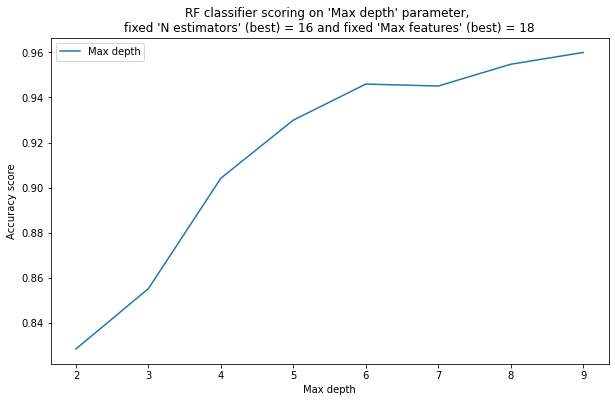

In [98]:
pylab.plot( list(x[1] for x in yy), list(x[0] for x in yy),  label = "Max depth")
pylab.xlabel("Max depth")
pylab.ylabel("Accuracy score")
pylab.title("RF classifier scoring on 'Max depth' parameter, \nfixed 'N estimators' (best) = %2d and fixed 'Max features' (best) = %2d" %  (best_n_estimators, best_max_features))
pylab.legend(loc = "best") 
pylab.rcParams["figure.figsize"] = [10, 6]

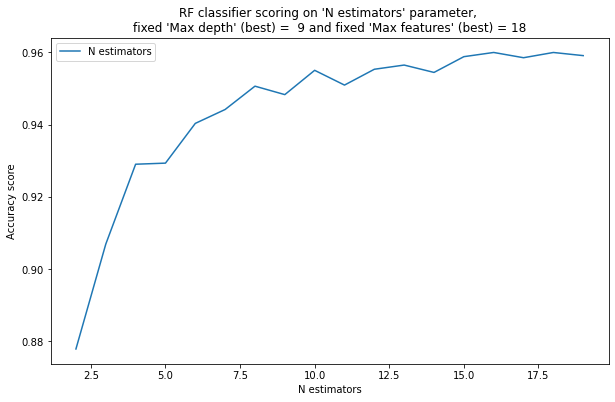

In [99]:
pylab.plot( list(x[1] for x in zz), list(x[0] for x in zz),  label = "N estimators")
pylab.xlabel("N estimators")
pylab.ylabel("Accuracy score")
pylab.title("RF classifier scoring on 'N estimators' parameter, \nfixed 'Max depth' (best) = %2d and fixed 'Max features' (best) = %2d" % ( best_max_depth, best_max_features) )
pylab.legend(loc = "best") 
pylab.rcParams["figure.figsize"] = [10, 6]

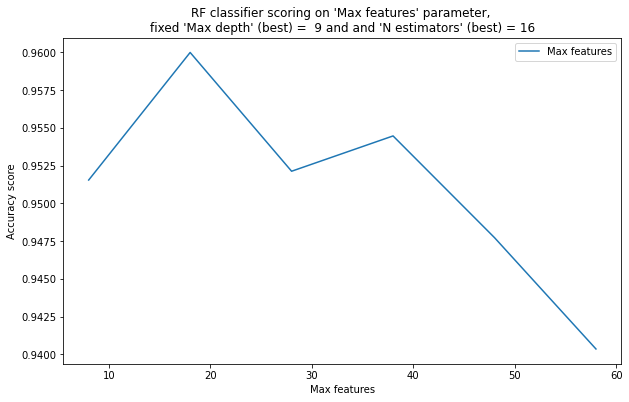

In [100]:
pylab.plot( list(x[1] for x in xx), list(x[0] for x in xx),  label = "Max features")
pylab.xlabel("Max features")
pylab.ylabel("Accuracy score")
pylab.title("RF classifier scoring on 'Max features' parameter, \nfixed 'Max depth' (best) = %2d and and 'N estimators' (best) = %2d" %  ( best_max_depth ,  best_n_estimators) ) 
pylab.legend(loc = "best") 
pylab.rcParams["figure.figsize"] = [10, 6]

#### Some statements related to the RF classification
1) The random forest is highly over-trained with the growth of the number of trees - **False**.

2) With a very small number of trees (5, 10, 15), a random forest performs worse than with a larger number of trees - **True**.

3) As the number of trees in a random forest grows, at some point there are enough trees for a high quality classification, and then the quality does not change significantly. - **True**.

4) With a large number of features (for a given dataset - 40, 50), the quality of classification becomes worse than with a small number of features (5, 10). This is due to the fact that the fewer features are selected at each node, the more different the trees are (because trees are highly unstable to changes in the training sample), and the better their composition works. - **True**.

5) With a large number of features (40, 50, 60), the quality of classification is better than with a small number of features (5, 10). This is due to the fact that the more features - the more information about the objects, which means that the algorithm can make predictions more accurately. - **False**.

6) With a small maximum depth of trees (5-6), the quality of the random forest is much better than without a depth limit, since the trees are not retrained. As the depth of the trees increases, the quality deteriorates. - **False**.

7) With a small maximum depth of trees (5-6), the quality of the random forest is noticeably worse than without restrictions, since the trees are obtained under-trained. With increasing depth, the quality first improves, and then does not change significantly, because due to averaging forecasts and differences in trees, their over-training in bagging does not affect the final quality (all trees are pre-trained differently, and when averaging, they compensate for each other's over-training). - **True**.